# Import de librerías

In [32]:
import pandas as pd
import numpy as np
import json
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
%matplotlib inline

**Lectura del data set de videos**

In [33]:
data = pd.read_csv("../data/DEvideos_cc50_202101.csv")

**Muestra de las 10 primeras filas del dataset**

In [34]:
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778)
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044)
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748)
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866)
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,False,False,False,Wir haben Meinungsstudie.de (► http://bit.ly/2...,Hessen,51.300007,9.500030,POINT (9.500029661999999 51.30000694)
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...,Rheinland Pfalz,49.982472,8.273219,POINT (8.273219156 49.98247246)
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,False,False,False,4 unbekannte Gesichter animierter Charaktere (...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822)
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ernährungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ernä...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292)
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe...",Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292)


**Muestra de la info del dataset**

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 20 columns):
video_id                  40840 non-null object
trending_date             40840 non-null object
title                     40840 non-null object
channel_title             40840 non-null object
category_id               40840 non-null int64
publish_time              40840 non-null object
tags                      40840 non-null object
views                     40840 non-null int64
likes                     40840 non-null int64
dislikes                  40840 non-null int64
comment_count             40840 non-null int64
thumbnail_link            40840 non-null object
comments_disabled         40840 non-null bool
ratings_disabled          40840 non-null bool
video_error_or_removed    40840 non-null bool
description               39288 non-null object
state                     40840 non-null object
lat                       40840 non-null float64
lon                       40840 non-n

**Contador de la cantidad de valores NAN en el dataset**

In [36]:
data.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Contador de la cantidad de valores NULL en el dataset**

In [37]:
data.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

**Eliminación de las filas cuyos video hayan presentando un error o hayan sido eliminados**

In [38]:
data = data.drop(data[data["video_error_or_removed"] == True].index)

**Determinar si existen datos repetidos**

Podemos notar que no existen valores repetidos

In [39]:
data.duplicated().value_counts()

False    40826
dtype: int64

# Lectura del archivo Json

**Lectura de los nombres de las categorías por "id" y creación de la columna "category" en el dataset**

In [40]:
f = open("../data/DE_category_id.json")

dataJson = json.load(f)

d = {}
for i in dataJson["items"]:
    d[int(i["id"])] = i["snippet"]["title"]
    
cate = []
for i in range(len(data.index)):
    cat_id = data.iloc[i]["category_id"]
    if cat_id not in list(d):
        cat_id = random.sample(list(d), 1)[0]
    cate.append(d[cat_id])
    
data["category"] = cate

In [41]:
data.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,...,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778),Entertainment
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,...,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822),Comedy
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),Entertainment
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,...,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748),Education
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,...,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),Entertainment
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,...,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,False,False,False,Wir haben Meinungsstudie.de (► http://bit.ly/2...,Hessen,51.300007,9.500030,POINT (9.500029661999999 51.30000694),People & Blogs
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""türken""|""schule""|""schulzeit""...",308683,35704,578,...,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...,Rheinland Pfalz,49.982472,8.273219,POINT (8.273219156 49.98247246),Comedy
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,...,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,False,False,False,4 unbekannte Gesichter animierter Charaktere (...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822),People & Blogs
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ernährungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ernä...",369173,16953,570,...,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...,Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),Comedy
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,...,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Berühmt werden kann jeder, aber berühmt bleibe...",Thuringen,50.970053,11.029962,POINT (11.02996212 50.97005292),Film & Animation


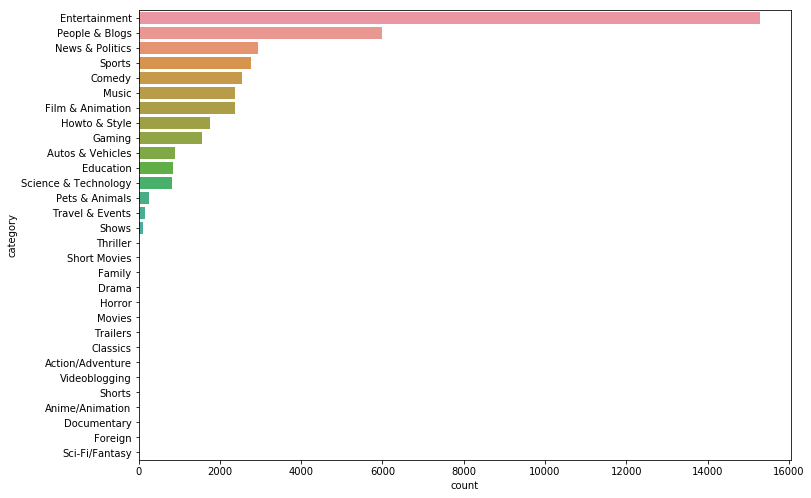

In [42]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='category', data=data, order = data['category'].value_counts().index)


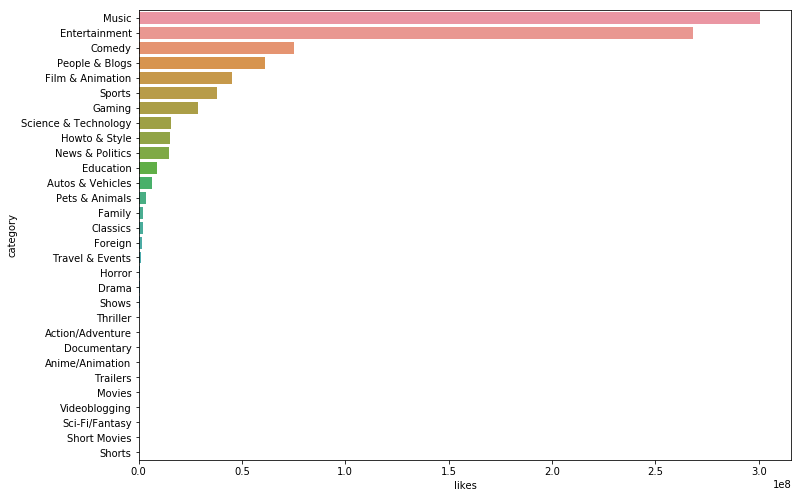

In [43]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='category', x='likes', data=data, ci=None, estimator=sum,
            order=data.groupby(['category'])['likes'].agg('sum').sort_values(ascending = False).index)


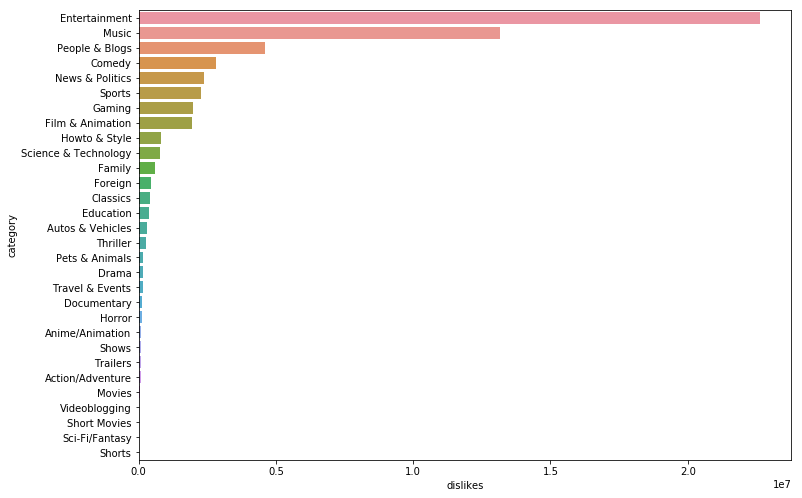

In [44]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='category', x='dislikes', data=data, ci=None, estimator=sum,
            order=data.groupby(['category'])['dislikes'].agg('sum').sort_values(ascending = False).index)


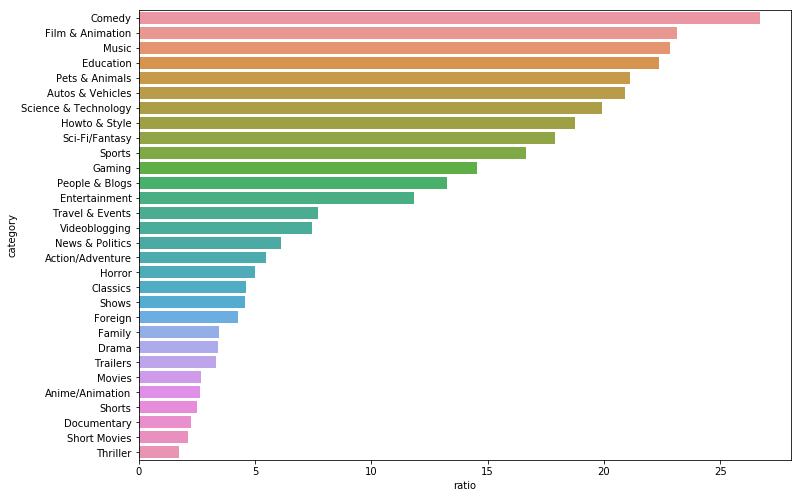

In [45]:
def ratio_likes_dislikes(x): return x['likes'].agg(
    'sum') / x['dislikes'].agg('sum')


r = data.groupby(['category']).apply(
    ratio_likes_dislikes).sort_values(ascending=False).reset_index(name='ratio')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='ratio', y='category', data=r, ci=None)


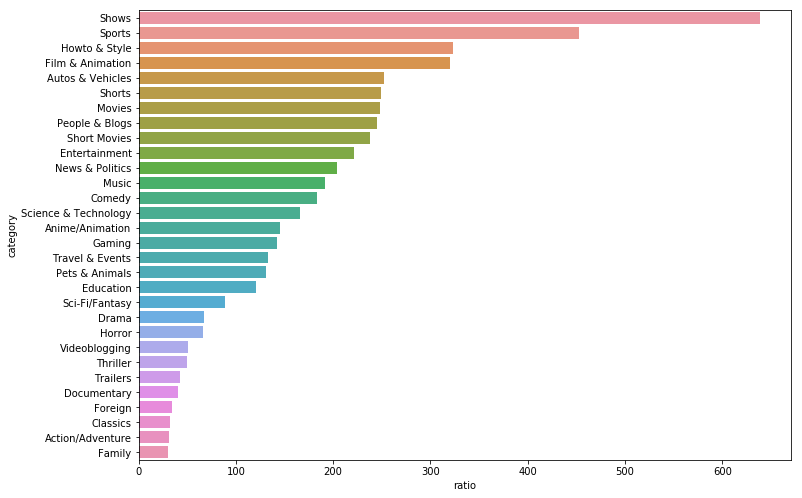

In [46]:
def ratio_views_comment(x): return x['views'].agg(
    'sum') / x['comment_count'].agg('sum')


r = data.groupby(['category']).apply(ratio_views_comment).sort_values(
    ascending=False).reset_index(name='ratio')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='ratio', y='category', data=r, ci=None)


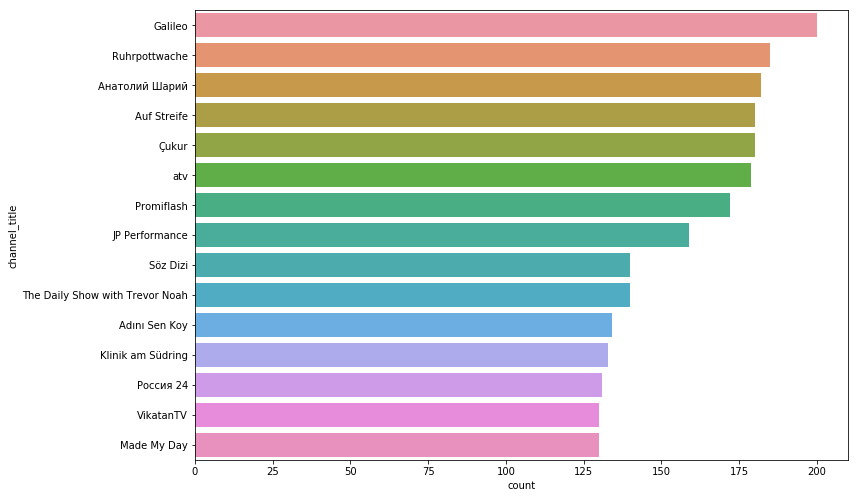

In [47]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='channel_title', data=data, order = data['channel_title'].value_counts().iloc[:15].index)


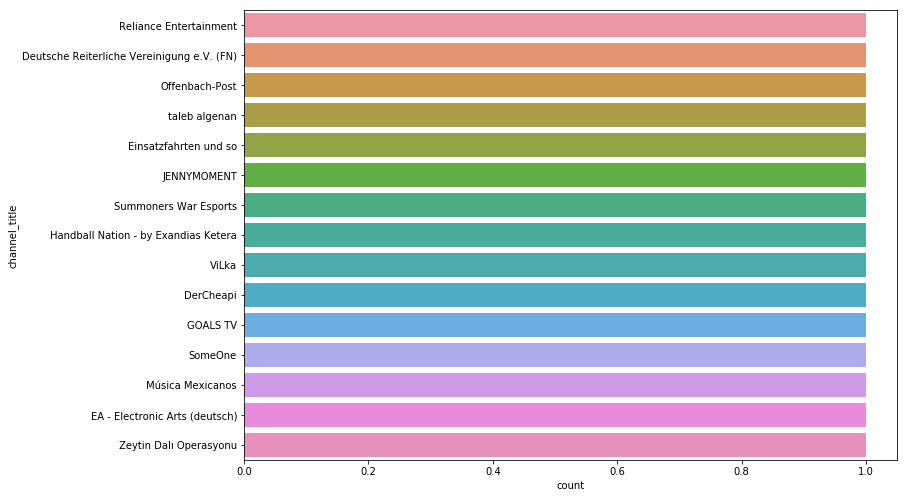

In [48]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='channel_title', data=data, order = data['channel_title'].value_counts().sort_values().iloc[:15].index)